# Query 5.1 

For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) ).

In [22]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

tp = pd.read_csv('Mid_Cap/TATAPOWER.csv')
tp['Daily_Returns'] = tp['Close Price'].pct_change()
daily_return_mean = tp['Daily_Returns'].mean()
daily_return_std = tp['Daily_Returns'].std()
annual_mean = daily_return_mean*252
annual_std = daily_return_std*math.sqrt(252)
print('The annual mean and standard deviation are:',annual_mean,annual_std)

The annual mean and standard deviation are: -0.10036039648685537 0.30826564980318755


# Query 5.2 

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance ).

In [23]:
cind = pd.read_csv('Mid_Cap/CASTROLIND.csv')
dhfl = pd.read_csv('Mid_Cap/DHFL.csv')
idbi = pd.read_csv('Mid_Cap/IDBI.csv')
igl = pd.read_csv('Mid_Cap/IGL.csv')
mrpl = pd.read_csv('Mid_Cap/MRPL.csv')

df = pd.DataFrame()
df['CIND'] = cind['Close Price']
df['DHFL'] = dhfl['Close Price']
df['IDBI'] = dhfl['Close Price']
df['IGL'] = dhfl['Close Price']
df['MRPL'] = dhfl['Close Price']

stocks = ['CIND','DHFL','IDBI','IGL','MRPL']
#Daily returns of stock prices
d_returns = df.pct_change()
#Building Covariance matrix out of returns
cov_matrix_d = d_returns.cov()
#Annualize it
cov_matrix_a = cov_matrix_d * 252
eq_weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
port_variance = np.dot(eq_weights.T, np.dot(cov_matrix_a, eq_weights))
port_volatility = np.sqrt(np.dot(eq_weights.T, np.dot(cov_matrix_a, eq_weights)))
port_volatility

6.737741938364049

# Query 5.3 

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio

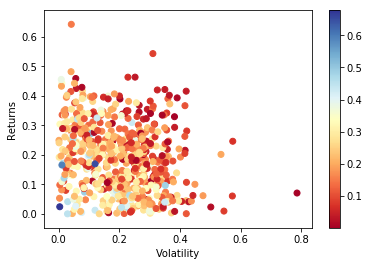

In [24]:
mean_d_returns = d_returns.mean()
dif_weights = np.asarray([0.5,0.2,0.2,0.1,0.3])

#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_d_returns * dif_weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(dif_weights.T,np.dot(cov_matrix_d, dif_weights))) * np.sqrt(252),2)

num_portfolios = 600

results = np.zeros((8,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_d_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix_d, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

# Query 5.4 

Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

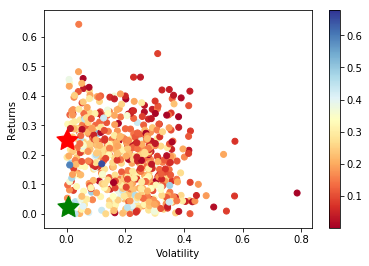

In [27]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='g',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='r',s=500) 